# Demo Monte Carlo Simulations

In this notebook, we demonstrate N>1 simulations being aggregated with our `MonteCarloProcessor`, and the corresponding metrics. For a more detailed look at a single simulation, refer to `demo_sim.ipynb.`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from src.sim import run_scenario
from src.sim.results import MonteCarloResults

pd.set_option("display.max_columns", None)
%load_ext autoreload
%autoreload 2

In [2]:
results: MonteCarloResults = run_scenario(
    "baseline", "wstETH", num_iter=1000, ncpu=12
)  # change num CPU if needed

[INFO][17:12:23][src.sim]-33881: Running scenario: baseline


[INFO][17:12:24][src.sim.scenario]-33881: Fetching sim_market from subgraph.
[INFO][17:12:34][src.utils.poolgraph]-33881: Found 20 valid trading cycles of length 3.
[INFO][17:12:34][src.sim.scenarios.baseline]-33881: Running 1000 simulations with 168 steps at frequency 1h
[INFO][17:12:34][src.sim.scenarios.baseline]-33881: Running simulation in parallel on 12 cores
[INFO][17:12:51][src.sim.scenarios.baseline.strategy]-33900: STARTING new simulation 1
[INFO][17:12:51][src.sim.scenarios.baseline.strategy]-33901: STARTING new simulation 22
[INFO][17:12:51][src.sim.scenarios.baseline.strategy]-33904: STARTING new simulation 85
[INFO][17:12:51][src.sim.scenarios.baseline.strategy]-33905: STARTING new simulation 106
[INFO][17:12:51][src.sim.scenarios.baseline.strategy]-33903: STARTING new simulation 64
[INFO][17:12:51][src.sim.scenarios.baseline.strategy]-33908: STARTING new simulation 169
[INFO][17:12:51][src.sim.scenarios.baseline.strategy]-33911: STARTING new simulation 232
[INFO][17:12:5

In [5]:
results.summary.to_csv("results.csv")

In [6]:
results.data[0].df.tail()

arbitrageur_profit  arbitrageur_volume  \
timestamp                                                     
2023-12-28 15:12:51       188816.622876                   0   
2023-12-28 16:12:51       189248.019834                   0   
2023-12-28 17:12:51       189814.766144                   0   
2023-12-28 18:12:51       190579.461207                   0   
2023-12-28 19:12:51       191296.809172                   0   

                     arbitrageur_count  liquidator_profit  liquidator_volume  \
timestamp                                                                      
2023-12-28 15:12:51                506       33459.405143                  0   
2023-12-28 16:12:51                509       33459.405143                  0   
2023-12-28 17:12:51                512       33459.405143                  0   
2023-12-28 18:12:51                515       33459.405143                  0   
2023-12-28 19:12:51                519       33459.405143                  0   

                     liquidator_count  keeper_profit  keeper_volume  \
timestamp                                                             
2023-12-28 15:12:51                 9            0.0              0   
2023-12-28 16:12:51                 9            0.0              0   
2023-12-28 17:12:51                 9            0.0              0   
2023-12-28 18:12:51                 9            0.0              0   
2023-12-28 19:12:51                 9            0.0              0   

                     keeper_count  borrower_profit  borrower_volume  \
timestamp                                                             
2023-12-28 15:12:51             0              0.0                0   
2023-12-28 16:12:51             0              0.0                0   
2023-12-28 17:12:51             0              0.0                0   
2023-12-28 18:12:51             0              0.0                0   
2023-12-28 19:12:51             0              0.0                0   

                     borrower_count  liquidityprovider_profit  \
timestamp                                                       
2023-12-28 15:12:51               0                       0.0   
2023-12-28 16:12:51               0                       0.0   
2023-12-28 17:12:51               0                       0.0   
2023-12-28 18:12:51               0                       0.0   
2023-12-28 19:12:51               0                       0.0   

                     liquidityprovider_volume  liquidityprovider_count  \
timestamp                                                                
2023-12-28 15:12:51                         0                        0   
2023-12-28 16:12:51                         0                        0   
2023-12-28 17:12:51                         0                        0   
2023-12-28 18:12:51                         0                        0   
2023-12-28 19:12:51                         0                        0   

                     aggregator_price  controller_wstETH_system_health  \
timestamp                                                                
2023-12-28 15:12:51          0.999312                         0.613003   
2023-12-28 16:12:51          0.999266                         0.617494   
2023-12-28 17:12:51          0.999279                         0.615767   
2023-12-28 18:12:51          0.999273                         0.615105   
2023-12-28 19:12:51          0.999305                         0.617322   

                     controller_wstETH_bad_debt  controller_wstETH_num_loans  \
timestamp                                                                      
2023-12-28 15:12:51                5.238751e+06                          313   
2023-12-28 16:12:51                5.238751e+06                          313   
2023-12-28 17:12:51                5.238751e+06                          313   
2023-12-28 18:12:51                5.238751e+06                          313   
2023-12-28 19:12:51                5.238751e+06 

- All metrics create 1 or more cols in the dataframe
- For each of these cols, we define (a) a way to summarize the col, and (b) a way to plot the col. Notice that (a) could create new columns.
- The summarized versions get appended to the Monte Carlo processor. The Monte Carlo processor can (a) plot the summarized data (e.g. histograms), (b) plot the non-summarized data for all runs in a single plot (e.g. timeseries plots of bad debt), and (c) reduce the summarized data into scalars?

In [7]:
summary = results.summary
summary

arbitrageur_profit_max  arbitrageur_volume_max  liquidator_profit_max  \
0             191296.809172                     0.0           33459.405143   
1             184780.448368                     0.0           19287.097967   
2             219340.919296                     0.0           31874.159916   
3             226863.539706                     0.0           30976.544187   
4             194129.019504                     0.0           31235.918110   
..                      ...                     ...                    ...   
995           207096.293480                     0.0           31030.170460   
996           185331.376298                     0.0           19650.448395   
997           213574.200445                     0.0           19790.712875   
998           169609.416362                     0.0           30892.545192   
999           180819.846826                     0.0           19233.396576   

     liquidator_volume_max  keeper_profit_max  keeper_volume_max  \
0                      0.0                0.0                0.0   
1                      0.0                0.0                0.0   
2                      0.0                0.0                0.0   
3                      0.0                0.0                0.0   
4                      0.0                0.0                0.0   
..                     ...                ...                ...   
995                    0.0                0.0                0.0   
996                    0.0                0.0                0.0   
997                    0.0                0.0                0.0   
998                    0.0                0.0                0.0   
999                    0.0                0.0                0.0   

     borrower_profit_max  borrower_volume_max  liquidityprovider_profit_max  \
0                    0.0                  0.0                           0.0   
1                    0.0                  0.0                           0.0   
2                    0.0                  0.0                           0.0   
3                    0.0                  0.0                           0.0   
4                    0.0                  0.0                           0.0   
..                   ...                  ...                           ...   
995                  0.0                  0.0                           0.0   
996                  0.0                  0.0                           0.0   
997                  0.0                  0.0                           0.0   
998                  0.0                  0.0                           0.0   
999                  0.0                  0.0                           0.0   

     liquidityprovider_volume_max  aggregator_price_max  \
0                             0.0              0.999988   
1                             0.0              0.999511   
2                             0.0              0.999807   
3                             0.0              0.999656   
4                             0.0              0.999705   
..                            ...                   ...   
995                           0.0              0.999590   
996                           0.0              0.999772   
997                           0.0              0.999652   
998                           0.0              0.999610   
999                           0.0              0.999477   

     aggregator_price_mean  aggregator_price_min  \
0                 0.999537              0.998973   
1                 0.999267              0.999049   
2                 0.999438              0.999042   
3                 0.999307              0.998942   
4                 0.999297              0.998828   
..                     ...                   ...   
995               0.999324              0.998905   
996               0.999283              0.998757   
997               0.999296              0.998884   
998               0.999345              0.999045   
999               0.9

In [17]:
cols = results.summary.columns
_df = results.summary[cols]
_df

arbitrageur_profit_max  arbitrageur_volume_max  liquidator_profit_max  \
0             191296.809172                     0.0           33459.405143   
1             184780.448368                     0.0           19287.097967   
2             219340.919296                     0.0           31874.159916   
3             226863.539706                     0.0           30976.544187   
4             194129.019504                     0.0           31235.918110   
..                      ...                     ...                    ...   
995           207096.293480                     0.0           31030.170460   
996           185331.376298                     0.0           19650.448395   
997           213574.200445                     0.0           19790.712875   
998           169609.416362                     0.0           30892.545192   
999           180819.846826                     0.0           19233.396576   

     liquidator_volume_max  keeper_profit_max  keeper_volume_max  \
0                      0.0                0.0                0.0   
1                      0.0                0.0                0.0   
2                      0.0                0.0                0.0   
3                      0.0                0.0                0.0   
4                      0.0                0.0                0.0   
..                     ...                ...                ...   
995                    0.0                0.0                0.0   
996                    0.0                0.0                0.0   
997                    0.0                0.0                0.0   
998                    0.0                0.0                0.0   
999                    0.0                0.0                0.0   

     borrower_profit_max  borrower_volume_max  liquidityprovider_profit_max  \
0                    0.0                  0.0                           0.0   
1                    0.0                  0.0                           0.0   
2                    0.0                  0.0                           0.0   
3                    0.0                  0.0                           0.0   
4                    0.0                  0.0                           0.0   
..                   ...                  ...                           ...   
995                  0.0                  0.0                           0.0   
996                  0.0                  0.0                           0.0   
997                  0.0                  0.0                           0.0   
998                  0.0                  0.0                           0.0   
999                  0.0                  0.0                           0.0   

     liquidityprovider_volume_max  aggregator_price_max  \
0                             0.0              0.999988   
1                             0.0              0.999511   
2                             0.0              0.999807   
3                             0.0              0.999656   
4                             0.0              0.999705   
..                            ...                   ...   
995                           0.0              0.999590   
996                           0.0              0.999772   
997                           0.0              0.999652   
998                           0.0              0.999610   
999                           0.0              0.999477   

     aggregator_price_mean  aggregator_price_min  \
0                 0.999537              0.998973   
1                 0.999267              0.999049   
2                 0.999438              0.999042   
3                 0.999307              0.998942   
4                 0.999297              0.998828   
..                     ...                   ...   
995               0.999324              0.998905   
996               0.999283              0.998757   
997               0.999296              0.998884   
998               0.999345              0.999045   
999               0.9

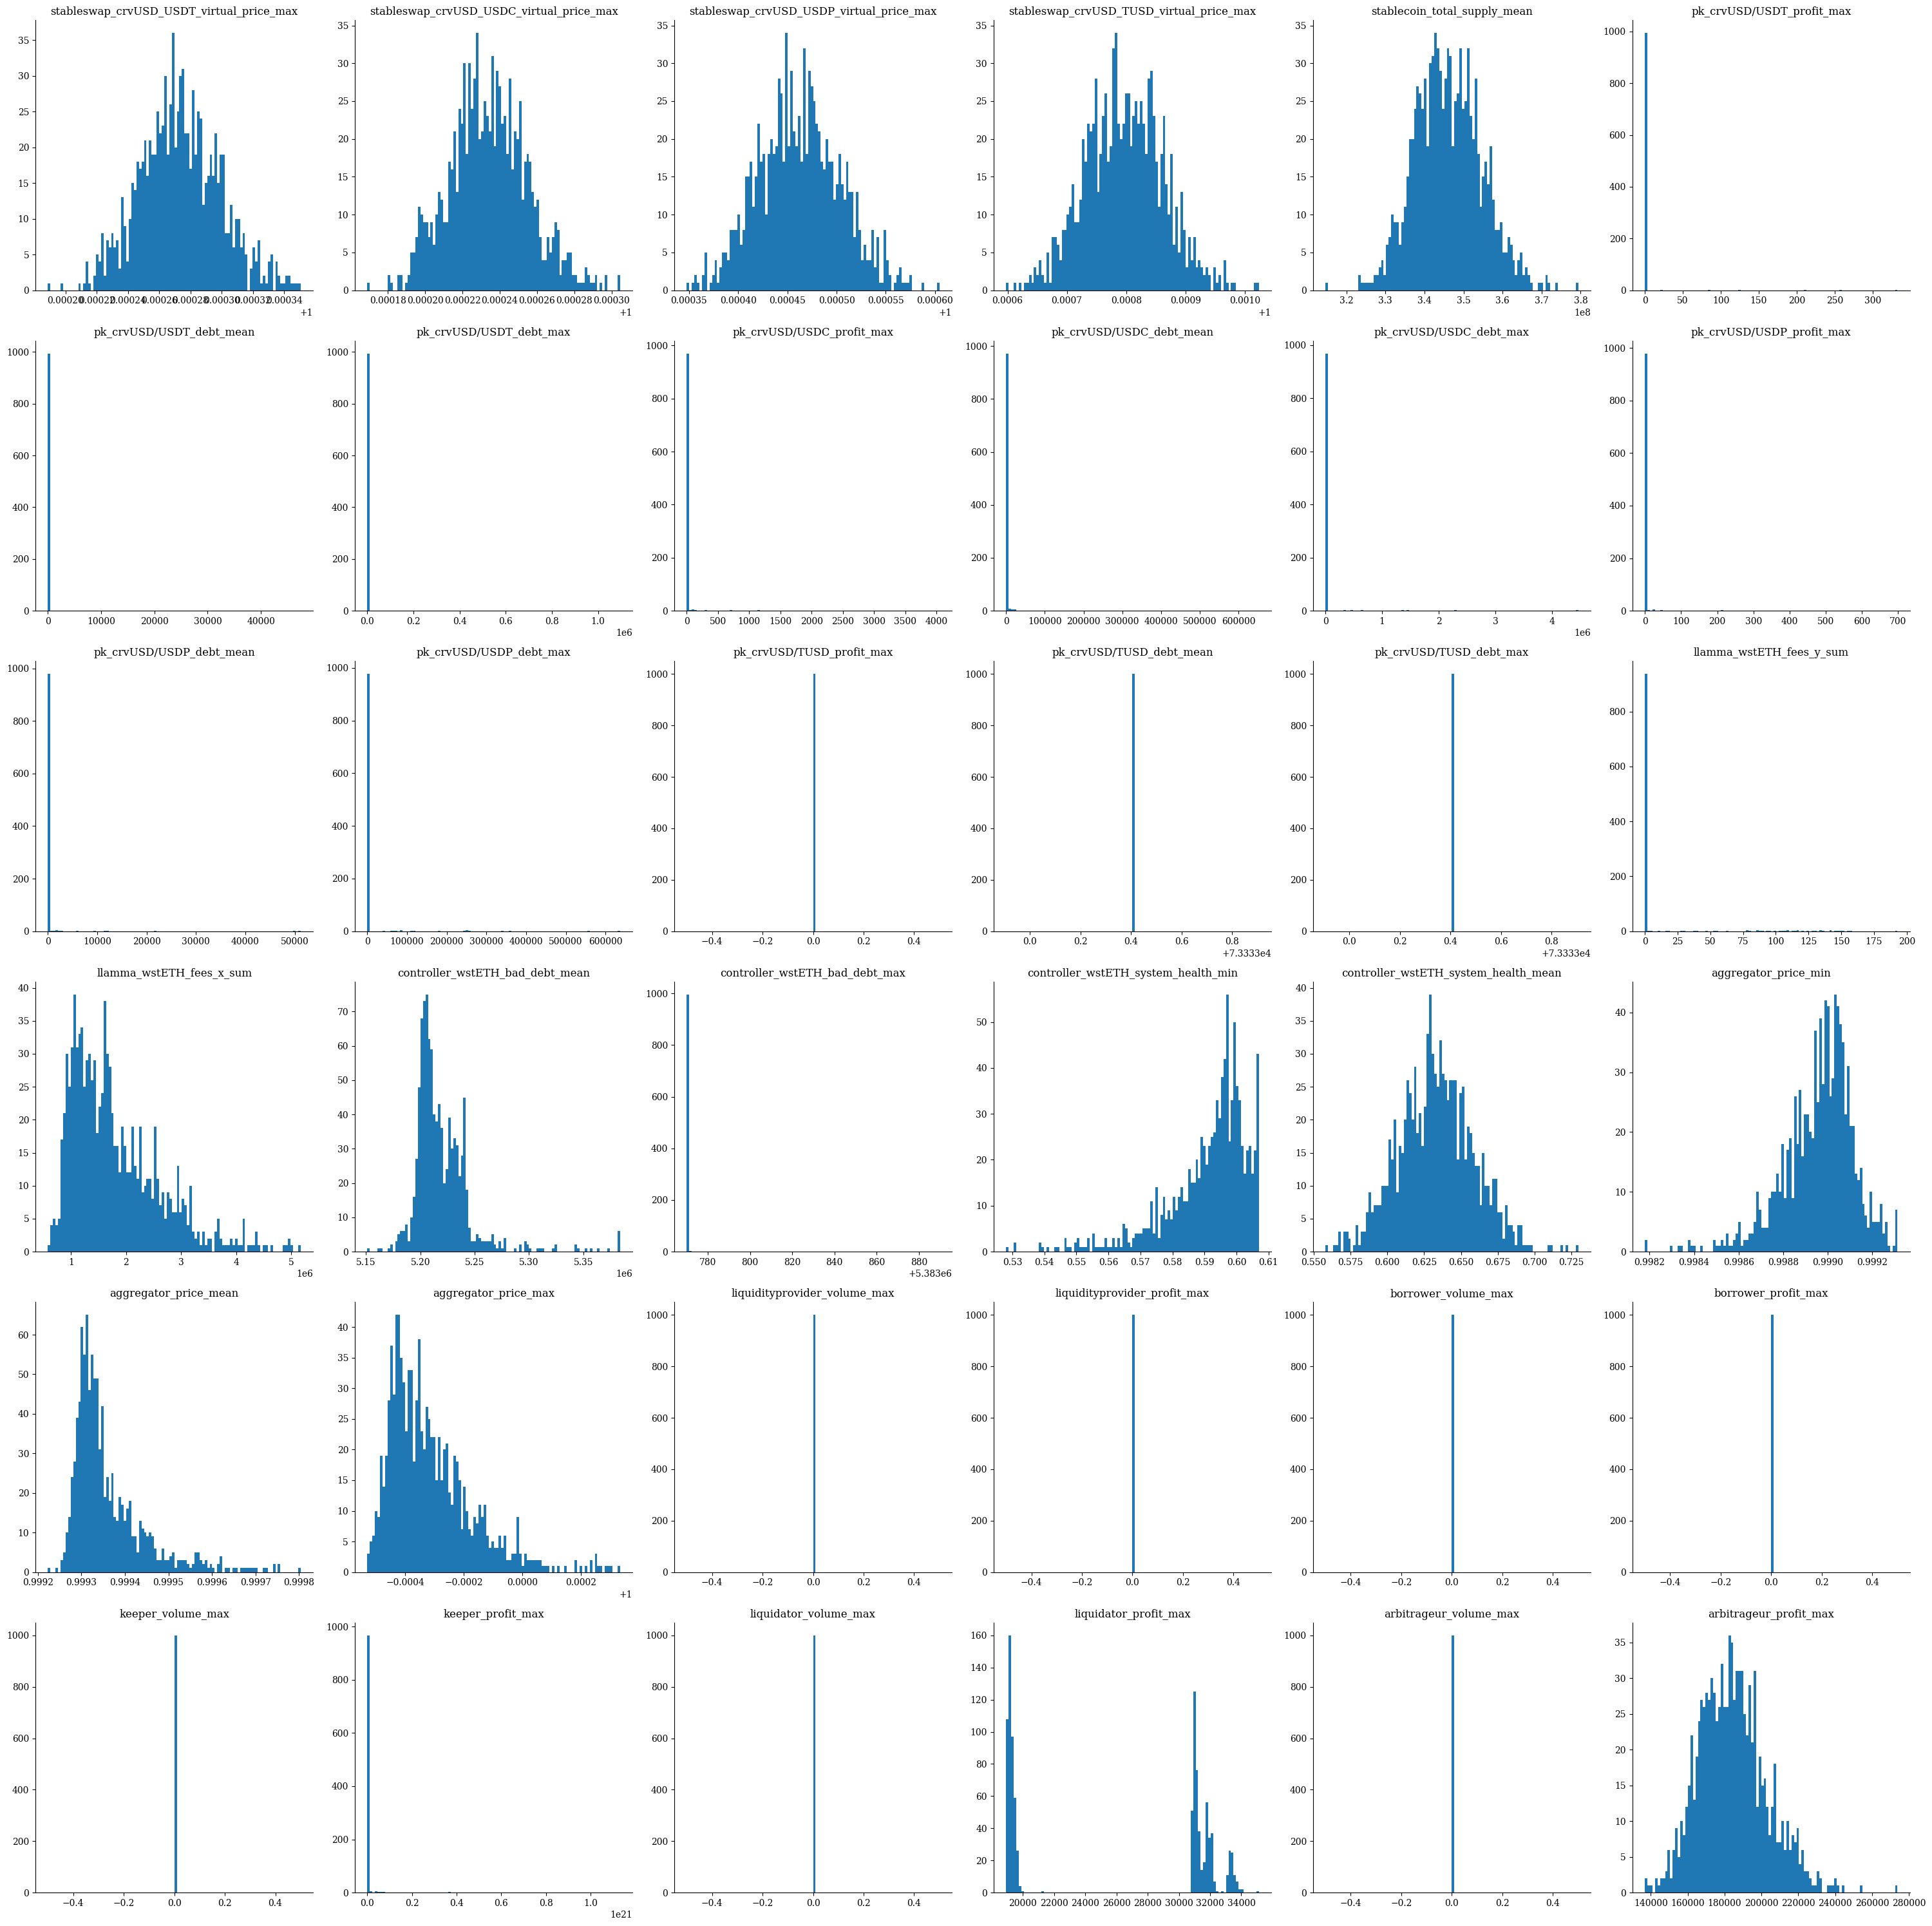

In [71]:
results.plot_summary(cols=list(results.summary.columns))
# if text is too small, save plot and zoom in, or plot less metrics

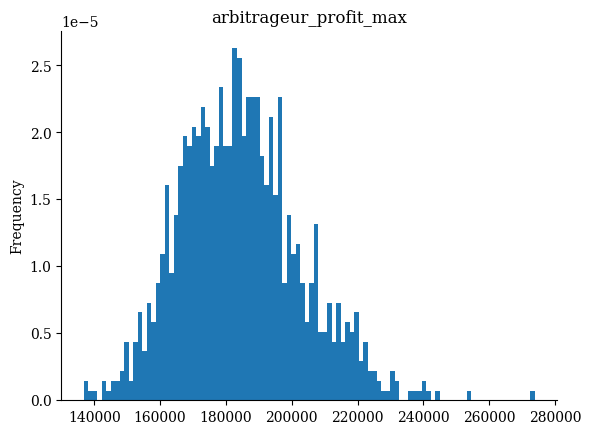

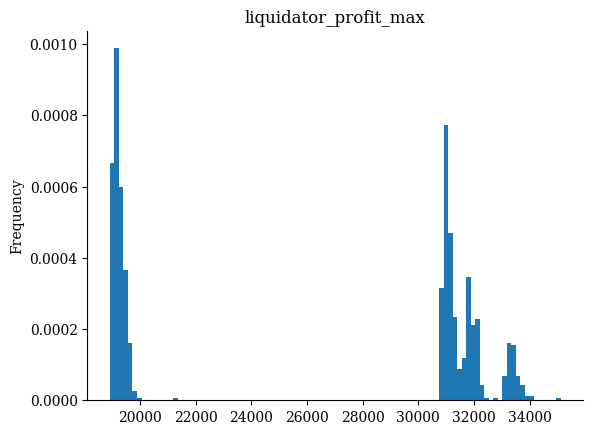

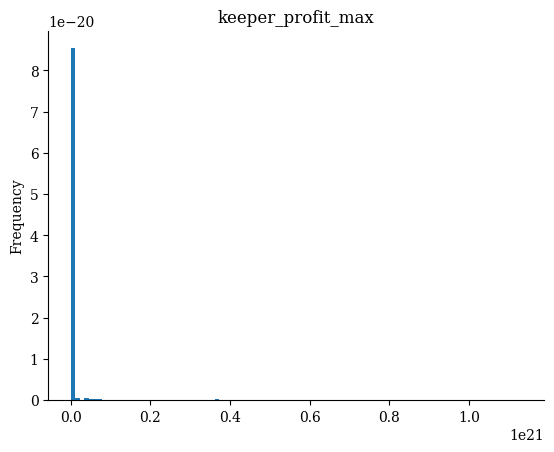

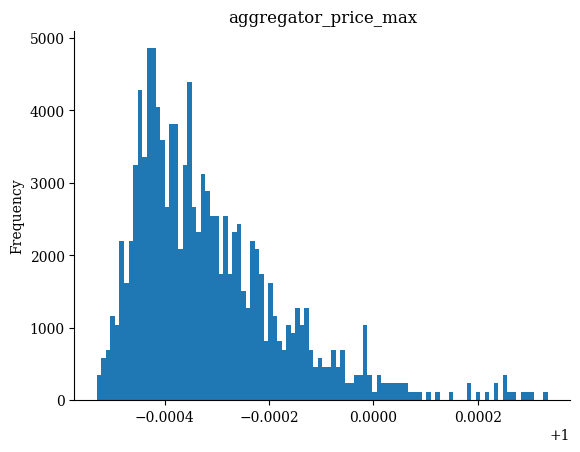

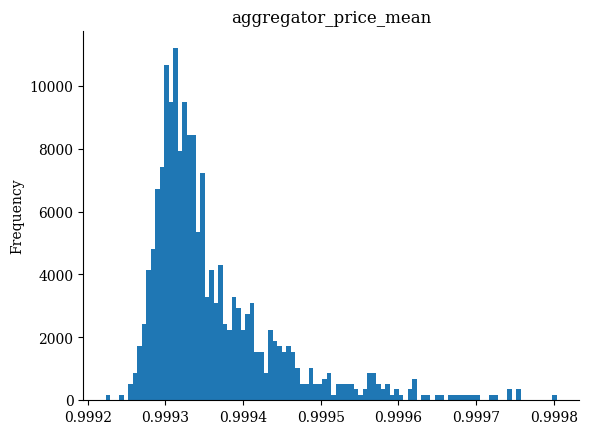

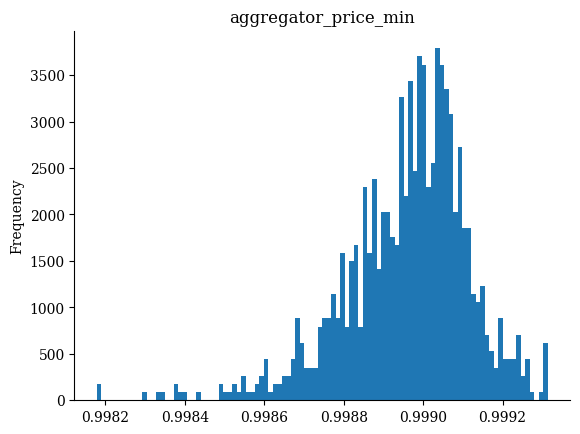

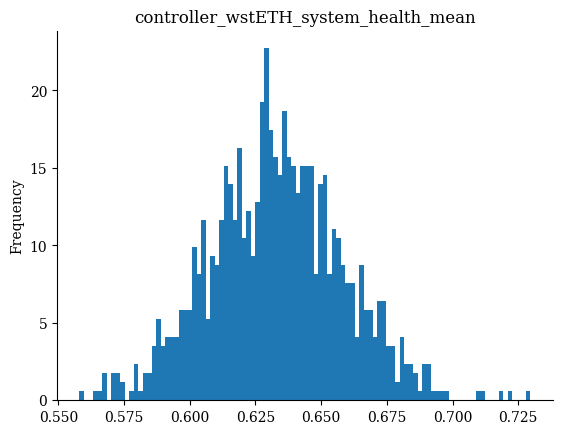

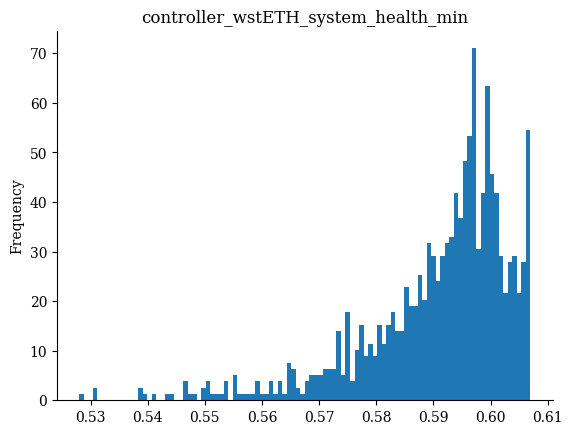

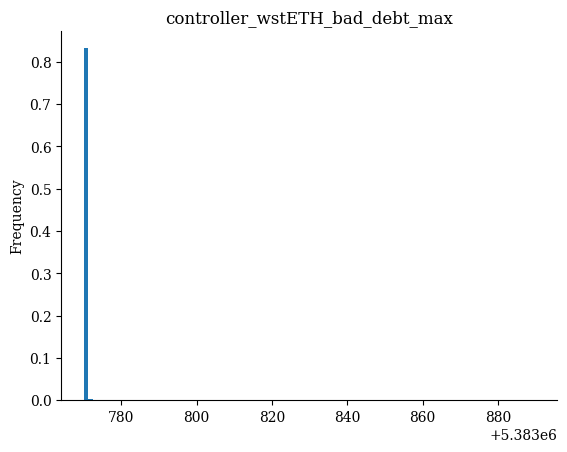

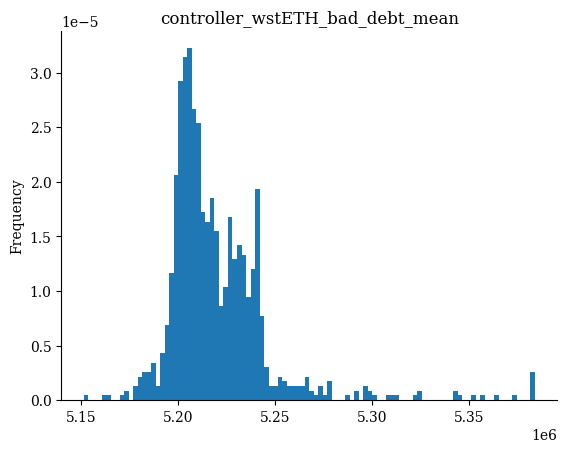

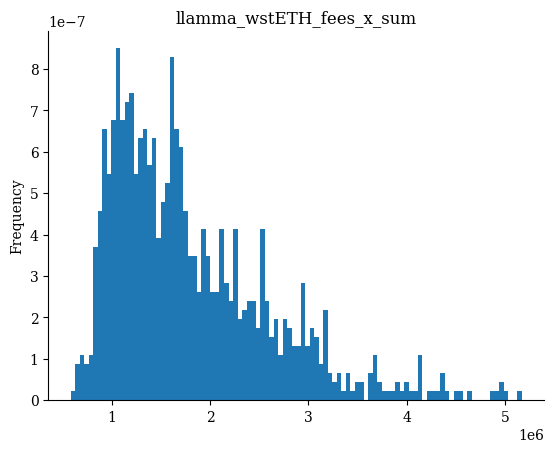

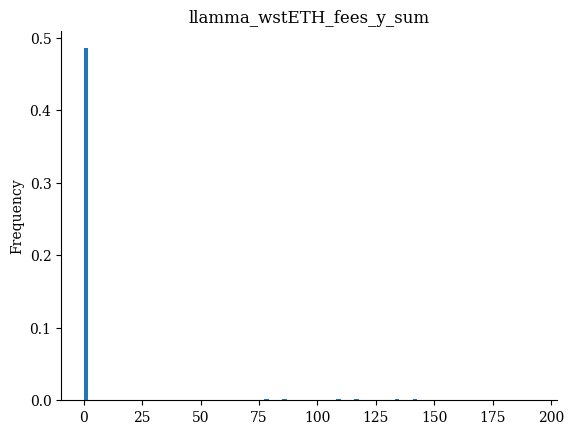

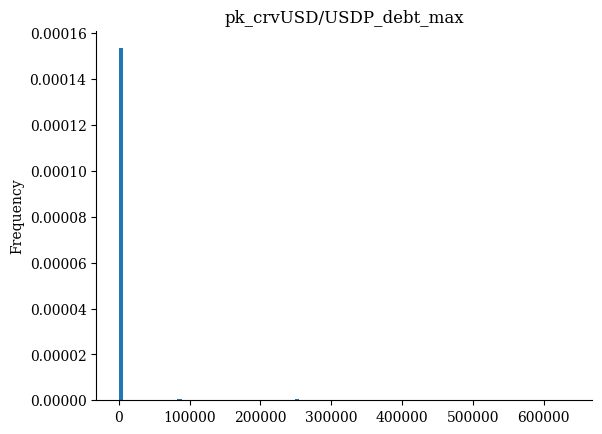

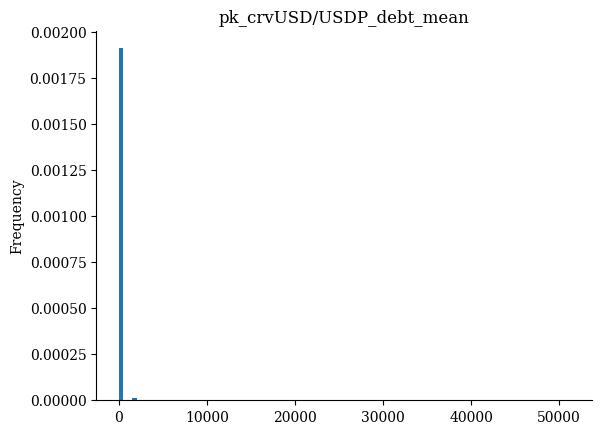

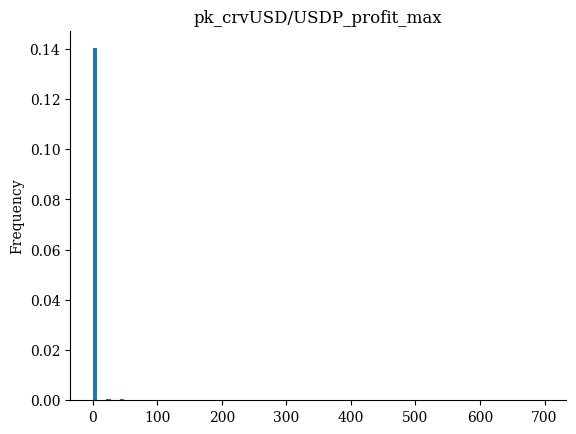

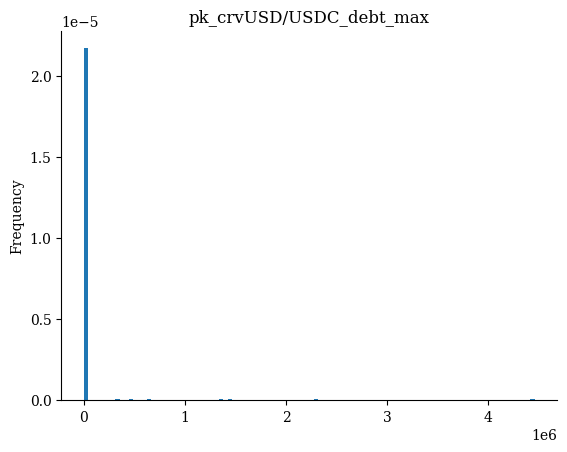

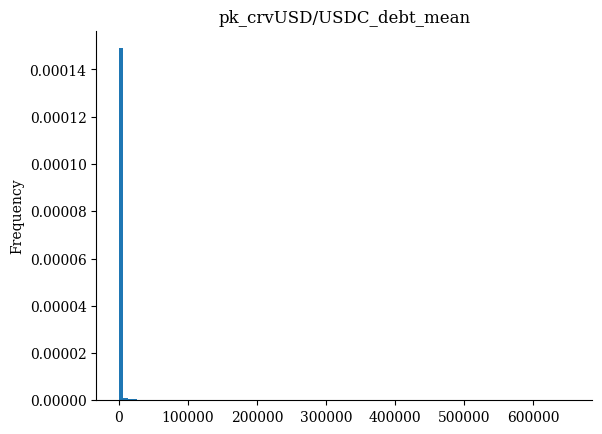

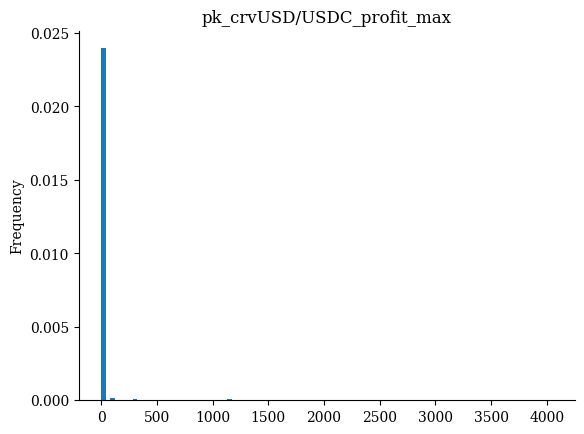

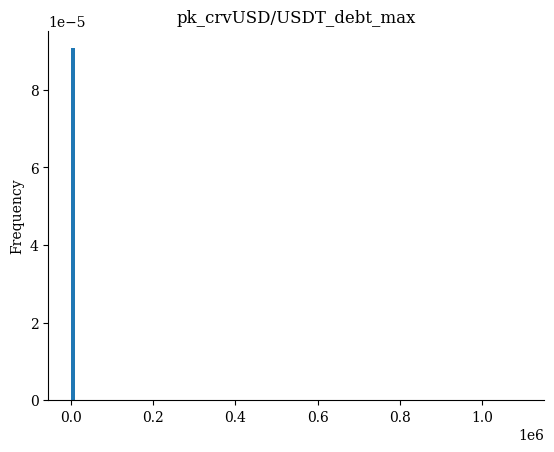

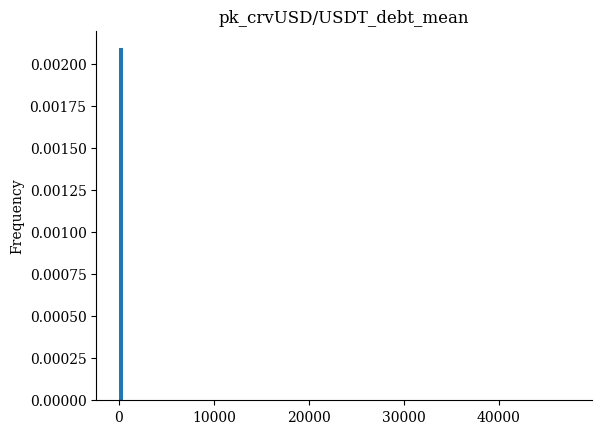

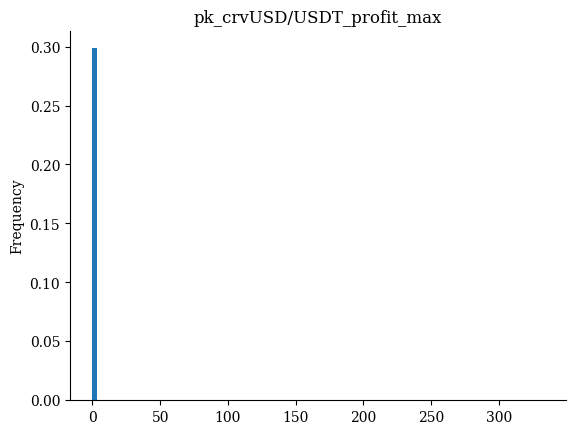

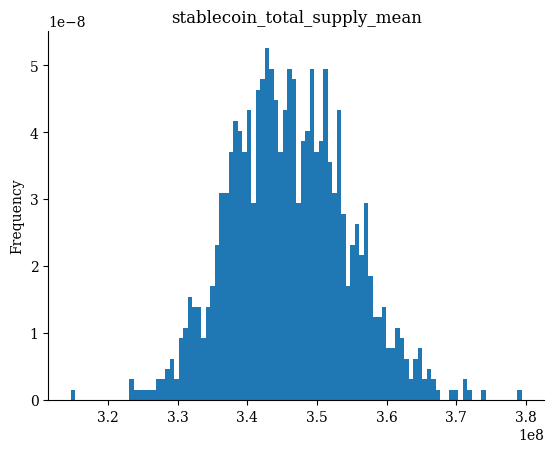

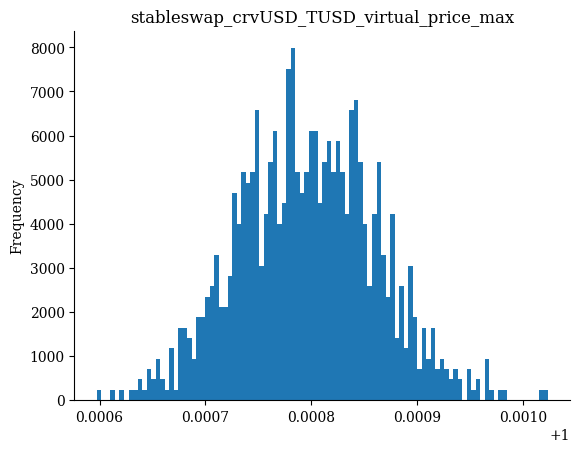

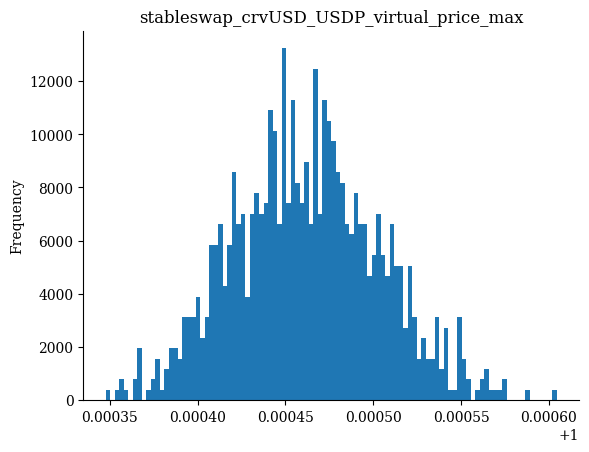

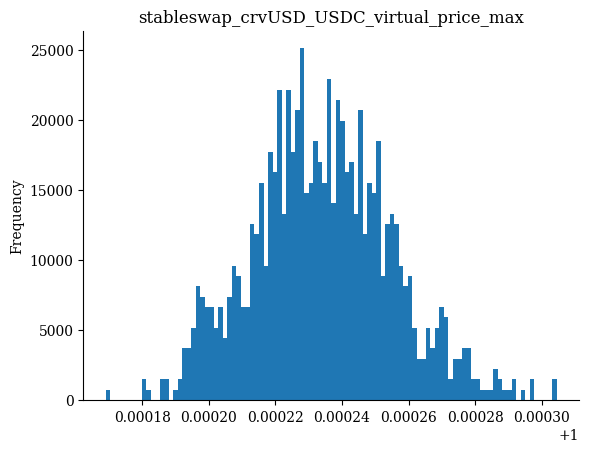

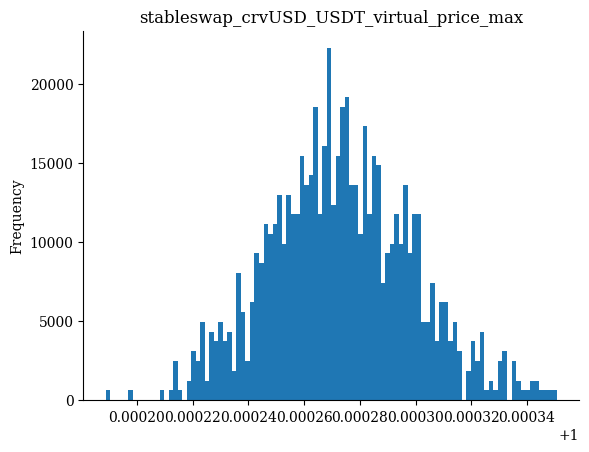

In [18]:
for col in summary:
    if len(summary[col].unique()) > 1:
        summary[col].plot(kind="hist", title=col, bins=100)
        plt.show()

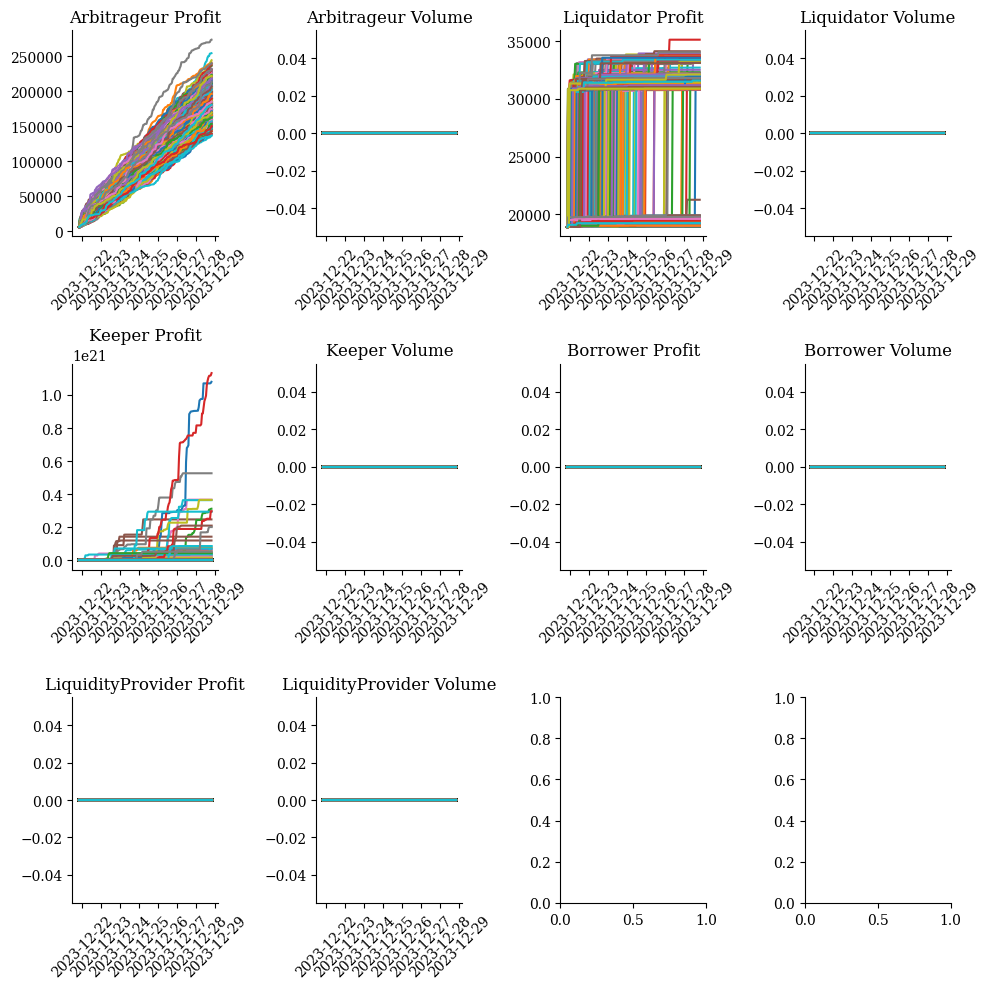

In [107]:
results.plot_runs(0)

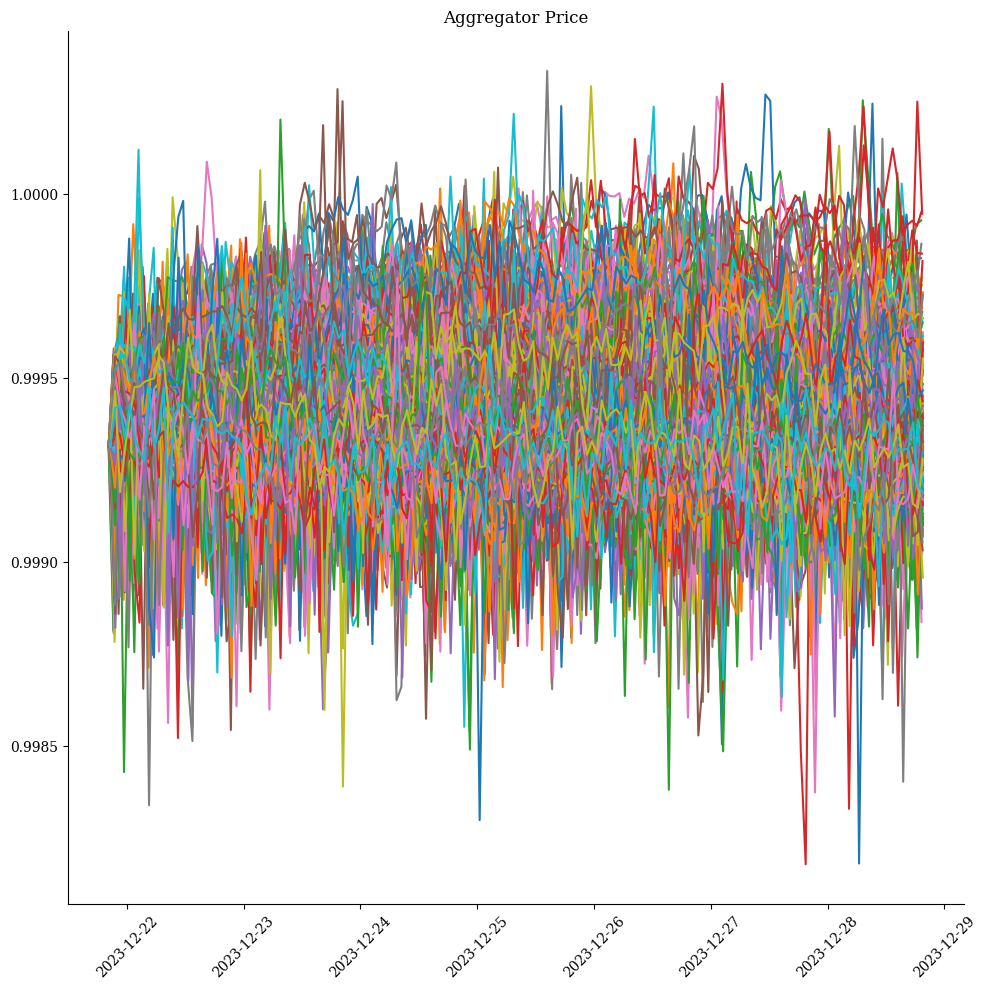

In [108]:
results.plot_runs(1)

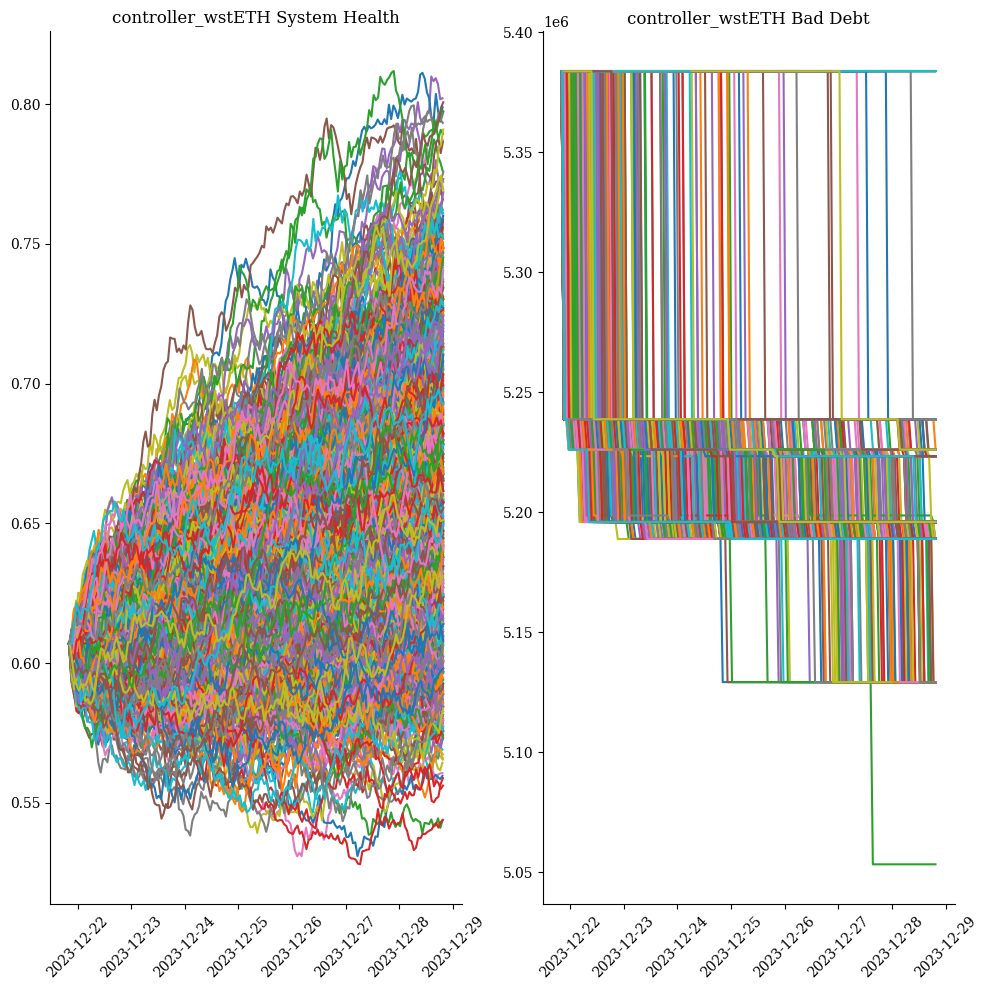

In [109]:
results.plot_runs(2)

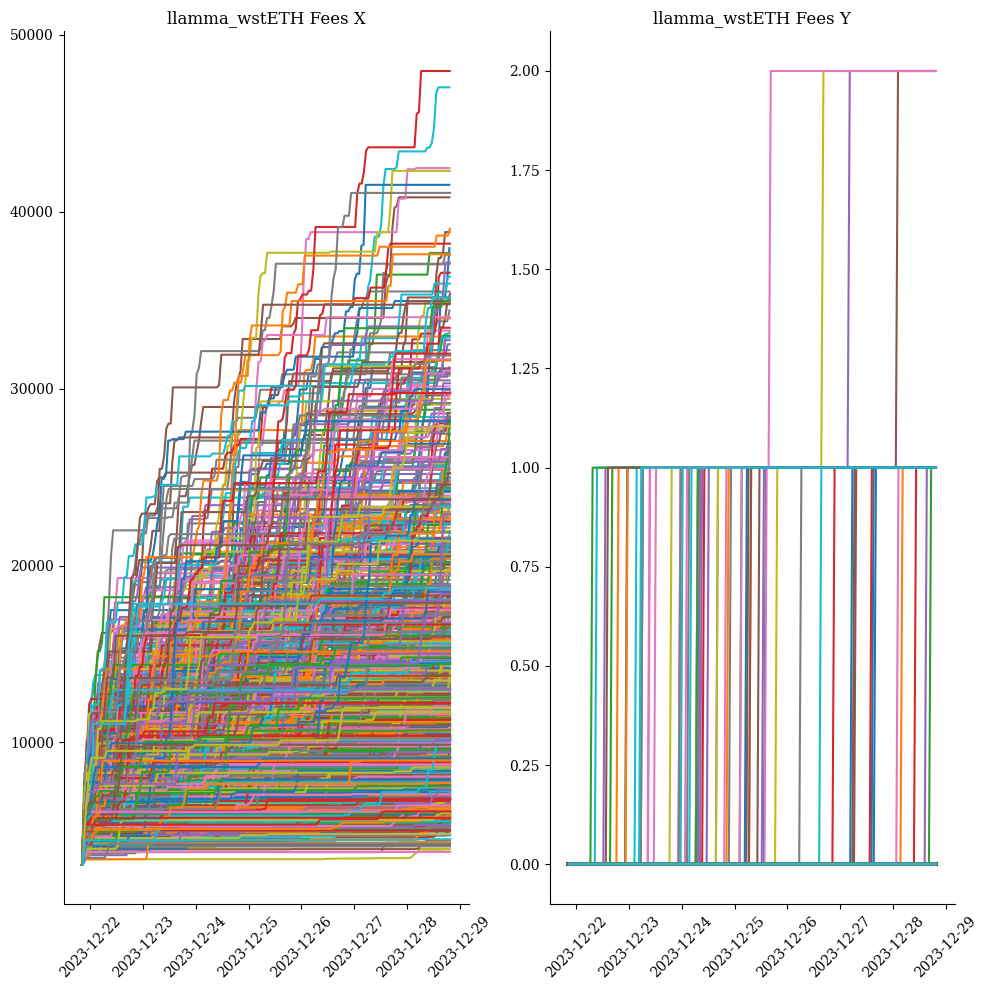

In [110]:
results.plot_runs(3)

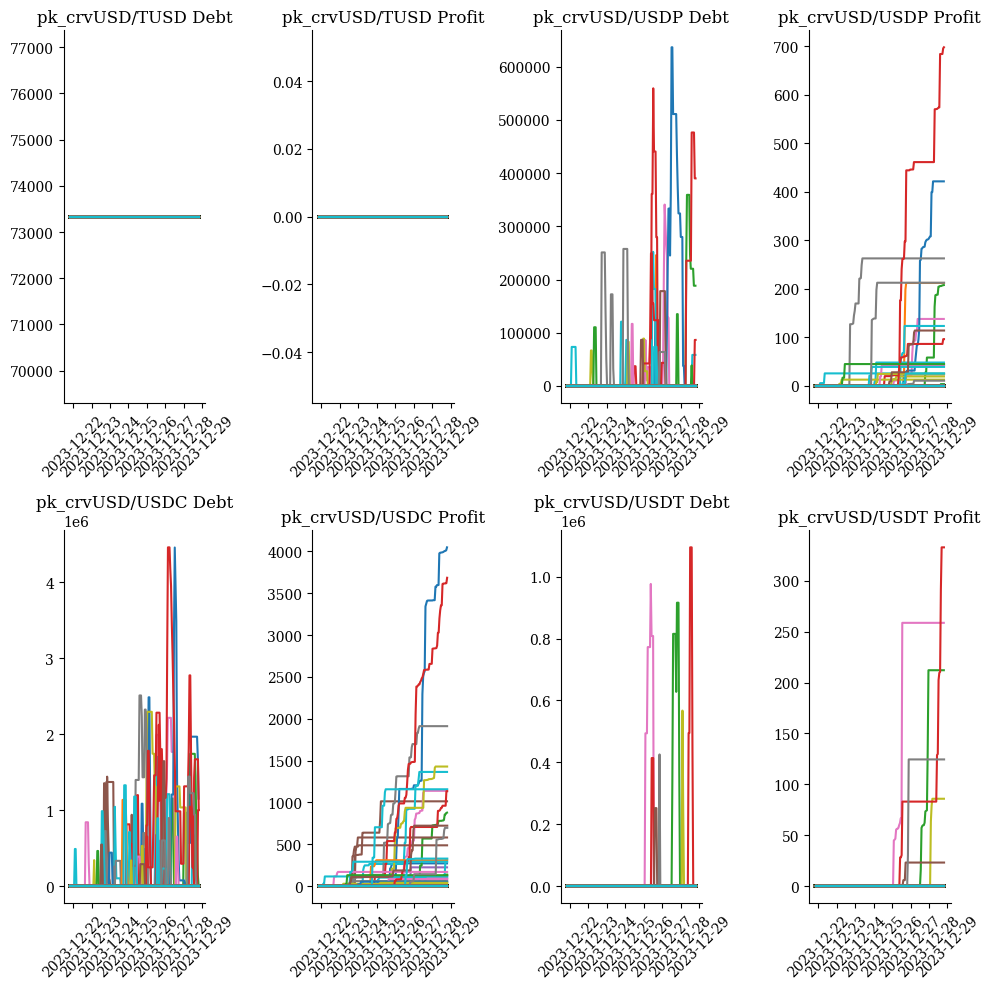

In [111]:
results.plot_runs(4)

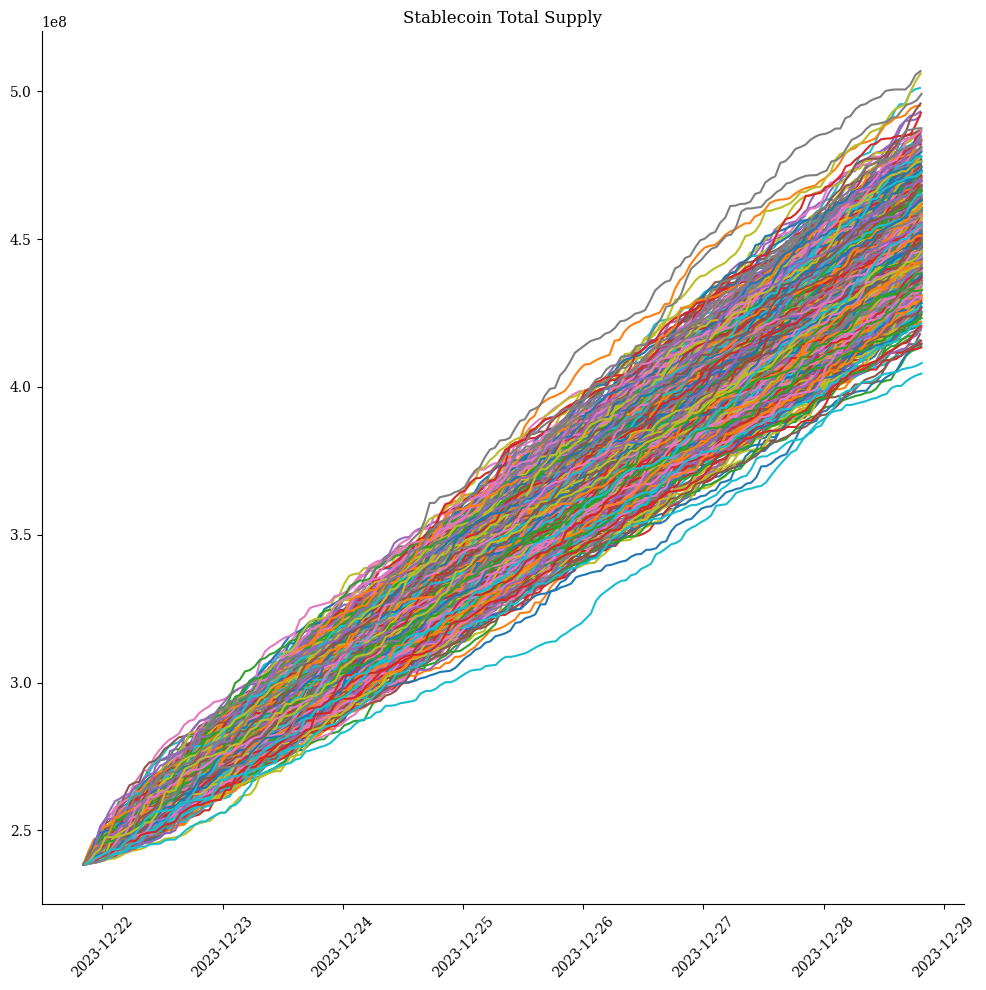

In [112]:
results.plot_runs(5)

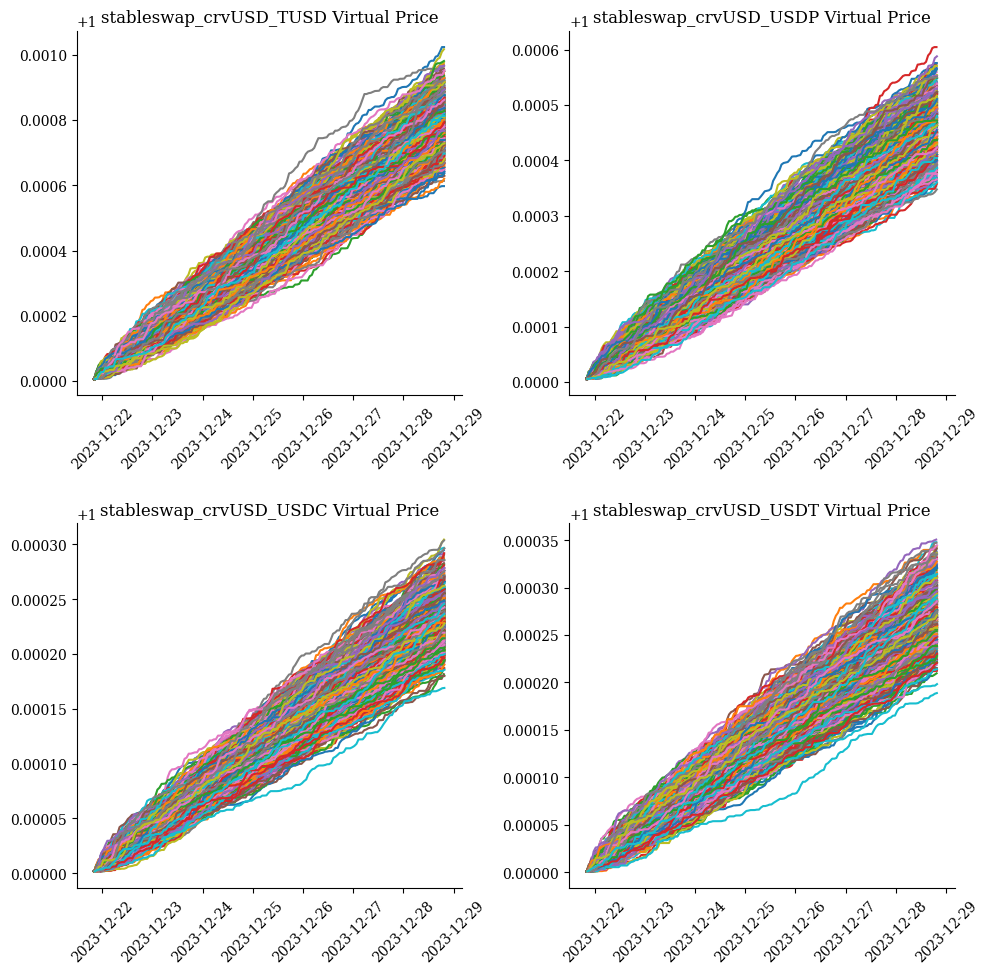

In [113]:
results.plot_runs(6)